In [77]:
import json
import numpy as np
from scipy.spatial import Delaunay
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import math

In [46]:
# Info: [lng, lat]

In [47]:
# Load geojson
# Define locations
filename = "cities_pop_10000000.geojson"
    
with open(filename) as f:
    gj = json.load(f)
    points = np.array([
        feat['geometry']['coordinates']
        for feat in gj['features']
    ])
    
print("Loaded " + str(len(points)) + " city coordinates")

Loaded 44 city coordinates


lng lat of highest dinstance point: [30.86776477 -6.92709417]
https://www.google.com/maps/search/?api=1&query=-6.9270941666666666,30.867764766666667


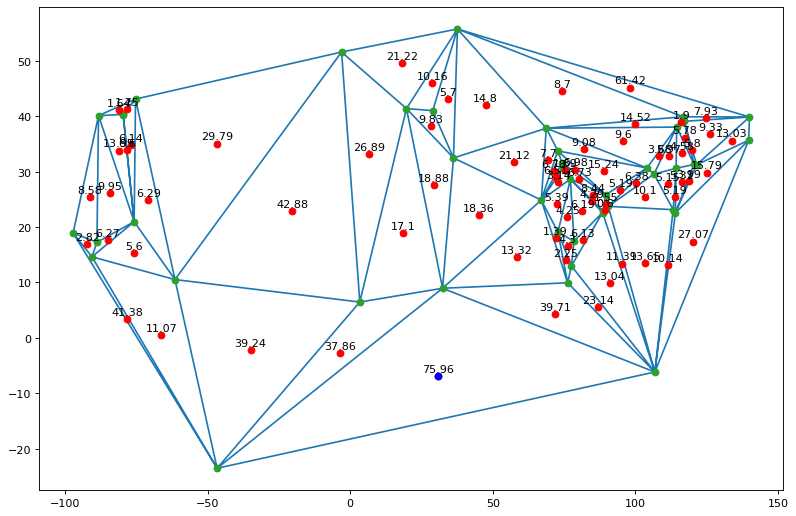

In [99]:
# triangulate the features via Delaunay method
tri = Delaunay(points)
distance_arr = []

# show triangulated points
figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.triplot(points[:,0], points[:,1], tri.simplices)
plt.plot(points[:,0], points[:,1], 'o')

# label triangles
for j, s in enumerate(tri.simplices):
    city_name = gj['features'][s[1]]['properties']['name']
    # get centroid of triangle
    p = points[s].mean(axis=0)
    
    # calculate distance
    dist = math.hypot(p[0] - points[s[0]][0], p[1] - points[s[0]][1])
    # add to referenced array
    distance_arr.append([s, dist])
    
    plt.plot(p[0], p[1], 'ro')
    plt.text(p[0], p[1] + 0.75, str(round(dist, 2)), ha='center')

# sort array by highest distance 
sorted_arr = sorted(distance_arr, key=lambda x: x[1], reverse=True)

# show point with highest distance 
hdt_s = sorted_arr[0][0];
hdt_centroid = points[hdt_s].mean(axis=0)

plt.plot(hdt_centroid[0], hdt_centroid[1], 'bo')

print("lng lat of highest dinstance point: " + str(hdt_centroid))
print("https://www.google.com/maps/search/?api=1&query=" + str(hdt_centroid[1]) + "," + str(hdt_centroid[0]))
    
plt.show()

In [88]:
# calculate barycentric coordinates (center of triangle)
# b = tri.transform[1,:2].dot(np.transpose(p - tri.transform[1,2]))
# np.c_[np.transpose(b), 1 - b.sum(axis=0)]